**Hotel Booking Dataset**




This dataset contains booking data for two types of hotels, includes data such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, and more.

[dataset](https://www.kaggle.com/datasets/jessemostipak/hotel-booking-demand)

We didn't do any transformations to the data so the dataset remains the same. Explanations for each column is provided in the link for the dataset.

***Binary Variables:***
  1. is_repeated_guest - if guest rebooked the hotel
  2. hotel - there are two types of hotel (Resort Hotel or City Hotel)

***Numerical variables:***
  1. lead_time - delta time between booking and arrival to hotel
  2. adr - #lodging transactions / #nights stayed
  
  We sample randomly (using a seed 42) 5000 rows from the dataset

In [25]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from scipy.stats import t
from scipy.stats import chi2

In [28]:
hotel_data = pd.read_csv('hotel_bookings.csv').sample(n=5000, random_state=42)
categories = ['lead_time', 'adr']
n = len(hotel_data)
hotel_data.head(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
30946,Resort Hotel,0,203,2016,December,49,2,2,5,2,...,No Deposit,250.0,NaN,0,Transient,66.8,0,0,Check-Out,2016-12-09
40207,City Hotel,1,82,2015,July,29,16,0,3,2,...,No Deposit,9.0,NaN,0,Transient,76.5,0,0,Canceled,2015-07-16
103708,City Hotel,0,25,2016,December,53,27,0,3,3,...,No Deposit,220.0,NaN,0,Transient-Party,60.0,0,1,Check-Out,2016-12-30
85144,City Hotel,0,1,2016,March,11,9,0,1,1,...,No Deposit,9.0,NaN,0,Transient-Party,95.0,0,0,Check-Out,2016-03-10
109991,City Hotel,0,70,2017,April,16,16,2,2,2,...,No Deposit,9.0,NaN,0,Transient,108.0,0,0,Check-Out,2017-04-20


# **Q1:  Estimators**



### **Answers for section a, b**

In [94]:
avg_estimators, std_estimators = {}, {}
z_value = norm.ppf(0.975)
n = len(hotel_data)

for cat in categories:
    avg_estimators[cat] = hotel_data[cat].mean()
    std_estimators[cat] = hotel_data[cat].std()

    print(f"Mean and CI for category {cat}:\n")
    print(f"average is: {avg_estimators[cat]:.3f}")

    ci_lower = avg_estimators[cat] - z_value * std_estimators[cat] / math.sqrt(n)
    ci_upper = avg_estimators[cat] + z_value * std_estimators[cat] / math.sqrt(n)
    print(f"confidence interval is: [{ci_lower:.3f}, {ci_upper:.3f}]\n")

Mean and CI for category lead_time:

average is: 105.707
confidence interval is: [102.698, 108.717]

Mean and CI for category adr:

average is: 100.802
confidence interval is: [99.484, 102.121]



## Q1 section B

The estimator distributes normally as we showed in class that the MLE estimator is the mean for each category, thus makes it asymptoctially normal.

Therefore showing for expectation: $$E(\bar{X}) = E(X) = \mu_x$$

For variance:
$$Var(\bar{X}) = \frac{1}{n^2} \sum_{i=1}^n \text{Var}[X_i] = \frac{Var(X)}{n} = \frac{\sigma_x^2}{n}$$

Therefore, using the central limit theorem and that MLE's are asymptotic normal we meet the assumptions requirements.



## Q1 section C:
 The adr confidence level don't **overlap** with the lead_time confidence level. The two variables fundamentally represent different ideas and as such whether they overlap or not **isn't meaningful** in any way.  

# **Q2:**

## **Section A:**

Looking the adr variable and the lead_time variable.

**Hypthosis:**

The null Hypothesis: lead_avg = adr_avg

Alternative: lead_avg $\neq$ adr_avg

## **Q2 Section B:**

The t-test assumptions are not all fufilled.

For example, for the lead_time variable as we saw in the graph from the previous project 1 homework. Reason being- looking at the histogram we see that the variable has a heavy-tailed distribution.

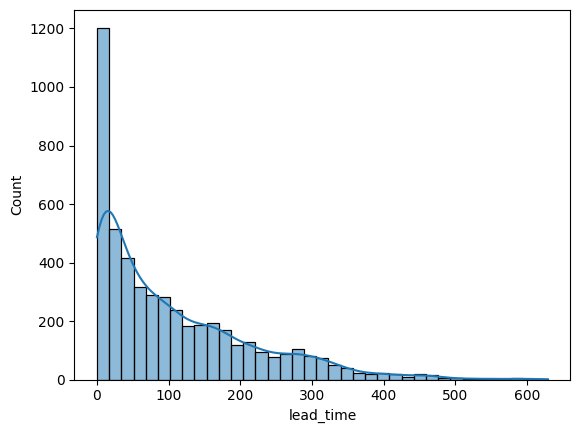

In [218]:
sns.histplot(hotel_data['lead_time'], kde=True)  # Add kde=True for a Kernel Density Estimate
plt.show()

## **Q2 Section C:**

In [219]:
n1, n2 = len(hotel_data['lead_time']), len(hotel_data['adr'])
avg_diff = avg_estimators['lead_time'] - avg_estimators['adr']
sp = (
        ((n1 - 1) * (std_estimators['lead_time'] ** 2)) +
        ((n2 - 1) * (std_estimators['adr'] ** 2))
    ) / (n1 + n2 - 2)
t_statistic = avg_diff / math.sqrt(sp * (1/n1 + 1/n2))

alpha = 0.05     # Significance level
df = 10000 - 1        # Degrees of freedom (replace with your value)

critical_value = t.ppf(1 - alpha/2, df)

p_value = 2 * (1 - t.cdf(abs(t_statistic), df))
if abs(t_statistic) > critical_value:
    print(f"Reject the null hypothesis (t = {t_statistic:.3f}, critical value = {critical_value:.3f})")
else:
    print(f"Fail to reject the null hypothesis (t = {t_statistic:.3f}, critical value = {critical_value:.3f})")

if (p_value < 0.001):
    print(f"p-value < 0.001")
else:
  print(f"p-value: {p_value:.3f}")



Reject the null hypothesis (t = 2.926, critical value = 1.960)
p-value: 0.003


## **Q2 Section D:**

In [220]:
se = (std_estimators['lead_time'] ** 2 / len(hotel_data['lead_time'])) + (std_estimators['adr'] ** 2 / len(hotel_data['adr']))
W_n = avg_diff / math.sqrt(se)

if abs(W_n) > z_value:
    print(f"Reject the null hypothesis (W_n = {W_n:.3f}, critical value = {z_value:.3f})")
else:
    print("Failed to reject the null hypothesis")

p_value = 2 * (1 - norm.cdf(abs(W_n)))
if (p_value < 0.001):
    print(f"p-value < 0.001")
else:
  print(f"p-value: {p_value:.3f}")

Reject the null hypothesis (W_n = 2.926, critical value = 1.960)
p-value: 0.003


### **Q2 Part E:**

for both tests we get p_value = 0.003

the tests give the same result. The test statistic comes out the same. This true as for large values of n we expect the Wald and t-test to give the same result.

Both tests reject the null hypothesis.

The results from the previous calculations support each other.

### **Q2 Part F:**

**Hypothesis:**

The Null Hypothesis: lead_avg - adr_avg = 0

Alternative: lead_avg - adr_avg $\neq$ 0

**Lamda test** (given in the project instructions) involves a lot of multiplications which isn't computational feasible to calculate since the numbers can easily explode to infinity or zero.
Therefore, we reduced the multiplications usong Log to sums to make the calculation feasible.

After doing some reductions we get the following expression which is equivalent to the lambda test:
$$2 \log \left(\frac{\mathcal{L}(\hat{\mu}_1, {\mu}_2)}{\mathcal{L}(\hat{\mu})}\right) = \\ n \log \left(\frac{\hat{\sigma}^2}{S_p^2}\right)
+ \sum_{i=1}^n \frac{(X_i - \hat{\mu})^2}{\hat{\sigma}^2}
- \sum_{i=1}^{n_1} \frac{(X_{i1} - \hat{\mu}_1)^2}{S_p^2}
- \sum_{i=1}^{n_2} \frac{(X_{i2} - \hat{\mu}_2)^2}{S_p^2}$$

In [46]:

X1 = np.array(hotel_data['lead_time'])
X2 = np.array(hotel_data['adr'])

X1_mean = avg_estimators['lead_time']
X2_mean = avg_estimators['adr']

X = np.concatenate([X1, X2])
X_mean = np.mean(X)
X_var = np.var(np.concatenate([X1, X2]))
s_p = sp #from Q2C

n = len(X1)
m = len(X2)

# Likelihood ratio calculation
Lamda = (n + m) * math.log(X_var ** 2 /(s_p ** 2))
Lamda += sum(((X[i] - X_mean) ** 2) for i in range(n+m)) / (X_var ** 2)
Lamda -= sum(((X1[i] - X1_mean) ** 2) for i in range(n)) / (s_p ** 2)
Lamda -= sum(((X2[i] - X2_mean) ** 2) for i in range(m)) / (s_p ** 2)

# Calculate the critical value, Chi-squared test
critical_value = chi2.ppf(0.95, 1)

# Output results
print(f"Likelihood ratio statistic (lambda): {Lamda:.5}")
print(f"Critical value at 95%: {critical_value:.4}\n")

if Lamda > critical_value:
    print("The Null Hypothesis is rejected")
else:
    print("Failed to reject the Null Hypothesis")



Likelihood ratio statistic (lambda): 13.119
Critical value at 95%: 3.841

The Null Hypothesis is rejected


# **Q3:**

In [201]:
def analyze_hotel_data(hotel_data, categories, sample_sizes, n_repeats, confidence_level=0.95):
    # Initialize results dictionary with consistent keys (size, cat)
    results = {
        'ci_lengths': { (size, cat): [] for cat in categories for size in sample_sizes },
        'p_values': { (size, cat): [] for cat in categories for size in sample_sizes },
        'ci_intervals': {}
    }

    # Initialize Wald test results with consistent keys (size, cat)
    wald_test_results = { (size, cat): [] for cat in categories for size in sample_sizes }

    z_value = norm.ppf((1 + confidence_level) / 2)
    pop_means = {cat: hotel_data[cat].mean() for cat in categories}

    for size in sample_sizes:
        for iteration in range(n_repeats):
            sample = hotel_data.sample(n=size)

            for cat in categories:
                sample_mean = sample[cat].mean()
                sample_std = sample[cat].std()
                se = sample_std / np.sqrt(size)

                # Confidence Interval
                ci_lower = sample_mean - z_value * se
                ci_upper = sample_mean + z_value * se
                ci_length = ci_upper - ci_lower
                results['ci_lengths'][(size, cat)].append(ci_length)

                # p-value calculation
                z_score = (sample_mean - pop_means[cat]) / se
                p_value = 2 * (1 - norm.cdf(abs(z_score)))
                results['p_values'][(size, cat)].append(p_value)

                # Wald test calculation
                if sample_std == 0:
                    wald_p_value = 1.0  # No variability in the sample
                    z_score_wald = 0
                else:
                    z_score_wald = (sample_mean - pop_means[cat]) / se
                    wald_p_value = 2 * (1 - norm.cdf(abs(z_score_wald)))
                wald_test_results[(size, cat)].append((wald_p_value, z_score_wald))

                if iteration == 0:
                    results['ci_intervals'][(size, cat)] = f"[{ci_lower:.3f}, {ci_upper:.3f}]"

    def sort_dict(results, k):
        return dict(sorted(results[k].items(), key=lambda x: (x[0][0], x[0][1])))

    # Create DataFrames from sorted dictionaries
    ci_intervals = pd.DataFrame.from_dict(sort_dict(results, "ci_intervals"), orient='index')
    ci_lengths = pd.DataFrame.from_dict(sort_dict(results, "ci_lengths"), orient='index')
    p_values = pd.DataFrame.from_dict(sort_dict(results, "p_values"), orient='index')

    # Align `p_values` structure with `ci_lengths`
    p_values.index = ci_lengths.index
    p_values.columns = ci_lengths.columns

    # Wald test summary calculation with consistent keys
    wald_test_summary = pd.DataFrame.from_dict({
        cat: {
            size: (
                np.mean([result[0] for result in wald_test_results[(size, cat)]]),  # Mean p-value
                np.mean([result[1] for result in wald_test_results[(size, cat)]])   # Mean z-score
            )
            for size in sample_sizes
        }
        for cat in categories
    })

    summaries = {
        'ci_length_summary': ci_lengths,
        'p_value_summary': p_values,
        'ci_intervals': ci_intervals,
        'wald_test_summary': wald_test_summary  # Add the Wald test summary here
    }

    return summaries


## **Q3 Section A:**

In [202]:
# Parameters
categories = ['lead_time', 'adr']
sample_sizes = [30, 50, 100, 500]
n_repeats = 100
z_value = norm.ppf(0.975)  # For 95% confidence
summaries = analyze_hotel_data(hotel_data, categories, sample_sizes, n_repeats)

## **Q3 Section B:**

In [203]:
print("\nConfidence Intervals:")
print(summaries['ci_intervals'])


Confidence Intervals:
                                   0
(30, adr)          [76.190, 104.080]
(30, lead_time)    [57.359, 121.775]
(50, adr)          [90.489, 111.877]
(50, lead_time)    [90.338, 136.222]
(100, adr)         [98.285, 117.736]
(100, lead_time)   [74.375, 114.465]
(500, adr)         [95.019, 102.809]
(500, lead_time)  [103.365, 122.355]


Comparing to our results in Q1, we can see that the estimator (the mean) is in the CI intervals here and in Q1.

Looking at the CI interval as we sample more examples we get a smaller interval that in 95% confidence. Compared to Q1 where we sample 5000 examples, we get that it's a subset of all the smaller sample intervals which makes sense because we expect to be more accurate with more samples.

## **Q3 Section C:**

In [221]:
print("\nWald Test (p-value, W_n):")
print(summaries['wald_test_summary'])
print("NOT an interval/range of numbers. The left number represents the p-value and the right number the W_n statistic")


Wald Test (p-value, W_n):
                                       lead_time  \
30    (0.49732475952786137, -0.2308351224833729)   
50    (0.5097632223595542, -0.07183936160982979)   
100  (0.4728275590510841, -0.050085042458295176)   
500    (0.515044903436805, 0.006105387802299389)   

                                             adr  
30    (0.4721932914501099, 0.019699601461653185)  
50   (0.5035556648906969, 0.0028084632894668166)  
100     (0.511749754080797, 0.23227452460551692)  
500  (0.49629280557169564, 0.028927450533530588)  
NOT an interval/range of numbers. The left number represents the p-value and the right number the W_n statistic


Q3 (C) Results:

For the Wald test in Q3 (C), the p-values are generally distributed around 0.5 (e.g., mean p-values: lead_time = 0.508, adr = 0.427 for sample size 30).
This suggests the null hypothesis (equality of population means) was not consistently rejected across the different sample sizes.
Q2 (C) Results:

For the Wald test in Q2 (C), the p-value (0.00343) indicates strong evidence against the null hypothesis, leading to its rejection.
The test statistic W_n(2.926) exceeds the critical value of z-score (1.960), confirming the rejection of the null hypothesis.

Hypothesis and Variables:

In Q3 (C), the Wald test evaluates whether the sample mean for a single variable (lead_time or adr) equals the population mean for that variable. This is a univariate test.
In Q2 (C), the Wald test compares the means of two variables (lead_time and adr). This is a test for the equality of two means (a two-sample test).

Q3 (C) involves multiple repetitions (100) of sampling, allowing a distribution of p-values and confidence interval lengths to assess sampling variability.
Q2 (C) focuses on a single hypothesis test (equality of two means) using the overall data (n=5000 for each variable).

The p-values in Q3 (C) are larger, reflecting less consistent evidence against the null hypothesis across samples.
The small p-value in Q2 (C) indicates strong evidence against the null hypothesis, suggesting a significant difference between the means of lead_time and adr.

The results are consistent with their respective contexts. The Wald test in Q2 (C) is more sensitive due to the larger sample size and different hypothesis.
The p-value of Q3 (C) is not directly comparable to Q2 (C) because the tests serve different purposes (single-variable mean vs. mean comparison across two variables).


## **Q3 Section D:**

In [211]:
def plot_summary(df, name):
    df = df.reset_index()
    df[['sample_size', 'variable']] = pd.DataFrame(df['index'].tolist(), index=df.index)
    df = df.drop(columns=['index'])

    df = df.melt(
        id_vars=['sample_size', 'variable'],
        var_name='data_point',
        value_name=name
    )

    plt.figure(figsize=(12, 6))
    sns.boxplot(data=df, x='sample_size', y=name, hue='variable')
    plt.title(f'Distribution of {name} as a Function of Sample Size')
    plt.xlabel('Sample Size')
    plt.ylabel(name)
    plt.legend(title='Variable')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()


**CI lengths:**

In [212]:
ci_lengths = summaries['ci_length_summary']
ci_lengths.head(6)


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
"(30, adr)",27.889493,28.824729,29.023890,30.728228,37.016406,25.719187,29.836318,25.620295,36.183223,33.930911,...,29.790678,26.724061,32.363898,32.369973,48.973816,29.251515,54.589198,28.658431,39.660705,35.604864
"(30, lead_time)",64.415838,64.504316,86.179125,62.944738,87.859634,84.912029,81.973435,84.362442,84.767413,75.597824,...,78.495131,94.592377,52.095995,71.333776,68.775798,59.984615,71.991574,87.177866,88.452919,58.755048
"(50, adr)",21.387170,24.931682,24.756882,19.167113,22.633462,30.819036,24.129820,19.631095,29.660342,23.516308,...,26.719146,25.307938,22.609924,24.835538,26.672458,17.117245,26.199995,26.325652,24.505981,21.947972
"(50, lead_time)",45.884867,65.782303,58.728245,50.655464,55.485078,71.614333,65.999699,67.284994,55.906155,67.839682,...,47.241051,77.666080,77.011271,52.704761,55.142678,59.499068,60.081326,68.402365,51.018338,49.715114
"(100, adr)",19.450778,16.805360,20.371390,18.813256,18.834703,16.692267,14.256869,19.336680,20.231916,16.043624,...,16.861351,21.537687,19.387490,18.162474,17.288911,16.771881,20.519106,19.171314,21.085929,18.860577
"(100, lead_time)",40.089417,41.032274,51.588290,45.834399,49.869089,43.316810,47.301642,39.786112,42.307691,45.518834,...,47.955169,42.040612,44.635553,40.035207,44.217876,47.004649,41.117026,49.988876,38.020467,39.348921


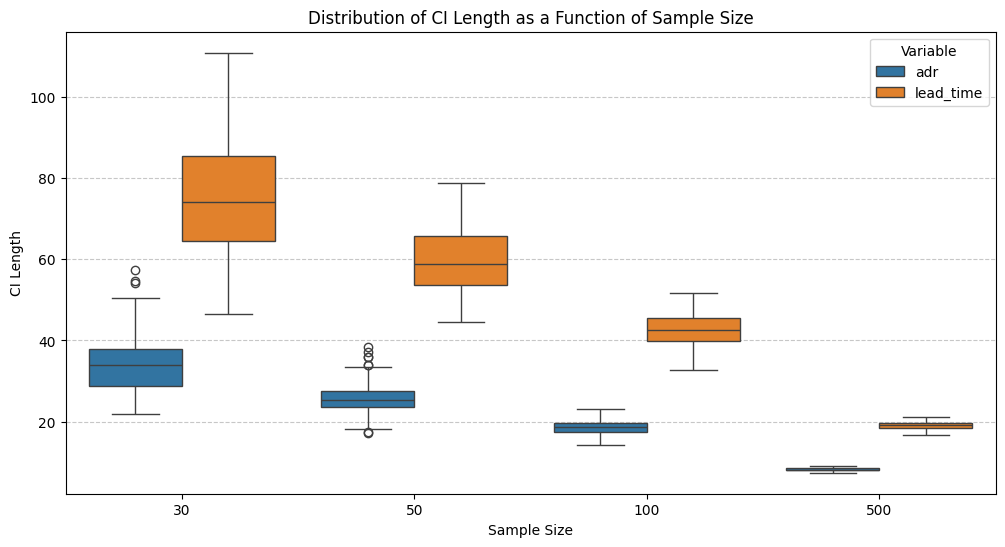

In [213]:
plot_summary(ci_lengths, 'CI Length')

**P-Value:**

In [214]:
p_values = summaries['p_value_summary']
p_values.head(6)

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
"(30, adr)",0.133797,0.978502,0.033836,0.238787,0.830573,0.011781,0.544461,0.099353,0.820973,0.269447,...,0.440184,0.023837,0.220199,0.587030,0.134762,0.893663,0.830698,0.857775,0.522784,0.230517
"(30, lead_time)",0.325992,0.531065,0.112486,0.935109,0.608125,0.814133,0.062237,0.461703,0.303721,0.888356,...,0.961203,0.661692,0.025728,0.977756,0.777440,0.229014,0.848543,0.406530,0.997904,0.029101
"(50, adr)",0.944354,0.639067,0.528015,0.883261,0.366204,0.872493,0.955225,0.008850,0.150437,0.746866,...,0.716858,0.559080,0.883607,0.989167,0.515904,0.018271,0.832129,0.167552,0.969910,0.620016
"(50, lead_time)",0.517681,0.094361,0.444821,0.645348,0.580268,0.927054,0.318161,0.758711,0.925557,0.845490,...,0.476119,0.877762,0.044734,0.704046,0.181700,0.078427,0.691246,0.229412,0.105184,0.300638
"(100, adr)",0.146319,0.564014,0.642266,0.682988,0.096910,0.569643,0.234267,0.952891,0.815696,0.242270,...,0.429612,0.659966,0.897357,0.443849,0.272073,0.224277,0.031767,0.568003,0.362422,0.880469
"(100, lead_time)",0.269733,0.590852,0.295677,0.843216,0.439590,0.659254,0.249272,0.242309,0.453932,0.988141,...,0.228803,0.800325,0.142545,0.671410,0.494709,0.059102,0.087336,0.283652,0.027162,0.243096


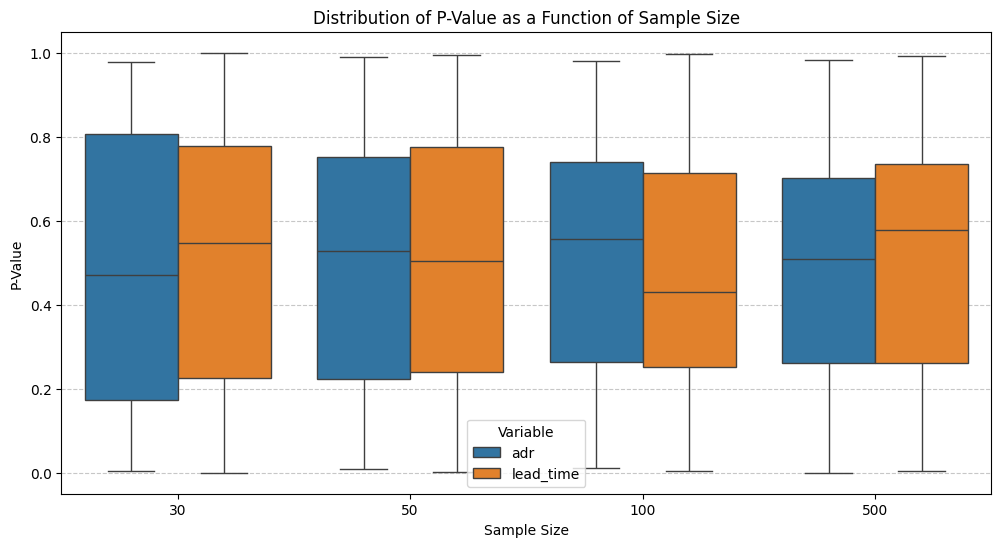

In [215]:
plot_summary(p_values, 'P-Value')

The percentage of time that the mean/average found in **Q1** is in the CI intervals calulated is 100% i.e. the average/mean of the variable was always in the CI interval.